PostgreSQL connection is closed
Tweets villarejo: 1598
Tweets futbol: 667
Tweets emoticonos buenos: 79
Tweets emoticonos malos: 23
Tweets negativos: 172
Tweets neutros: 347
Tweets positivos: 114
959
400
47
14
103
208
68
Tweets training: 1799
Tweets testing: 1201


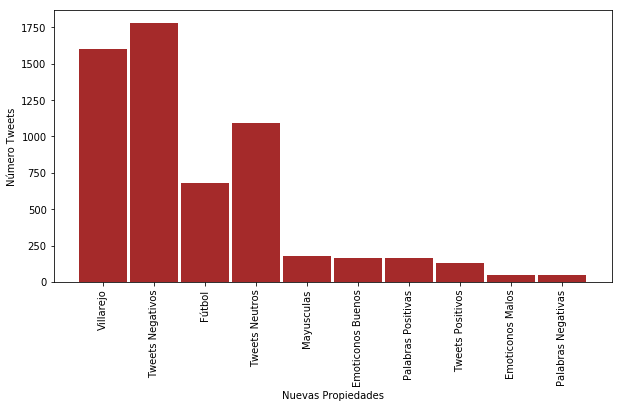

In [89]:
import psycopg2
import sys, nltk, re, string, heapq, gensim
from psycopg2 import Error
import random
import pandas as pd
import pandas.io.sql as sqlio

import matplotlib.pyplot as plt

def crearConexion():
    
    connection = psycopg2.connect(user = "m.soto.montesinos",
                                      password = "1234",
                                      host = "127.0.0.1",
                                      port = "5432",
                                      database = "twitterBBVA")

    return connection


def obtenerTweets():

    try:
        
        connection = crearConexion()
        query = "select clasificacion, status_id, caso_villarejo, futbol, emoticonos_buenos, emoticonos_malos, lista_palabras_positivas, lista_palabras_negativas, mayusculas from training_set_bueno"
        
        tweets = sqlio.read_sql_query(query, connection)
        
    except (Exception, psycopg2.DatabaseError) as error :
    
        print ("Error obteniendo los datos", error)
    
    finally:
        
        if (connection):
            
            connection.close()
            print("PostgreSQL connection is closed")

    return tweets


def guardar_datos_db(tweet_id, columna):

    try:
        
        connection = crearConexion()
        cursor = connection.cursor()
        
        if columna == 'es_training':
            
            query = """
                        UPDATE training_set_bueno SET es_training = 1 where status_id = '%s';
                        """ % (tweet_id)
                
            
        elif columna == 'es_testing':
            
            query = """
                        UPDATE training_set_bueno SET es_testing = 1 where status_id = '%s';
                        """ % (tweet_id)
        
        cursor.execute(query)
        connection.commit()
        
    except (Exception, psycopg2.DatabaseError) as error :
    
        print ("Error obteniendo los datos", error)
    
    finally:
        
        if (connection):
            
            connection.close()
            cursor.close()
            print("PostgreSQL connection is closed")
            
            
def dividir_tweets(tweets):
    
    numeroTweets = int(round(0.6 * len(tweets)))
    print(numeroTweets)
    tweetsAleatorios = tweets[:]
    random.shuffle(tweetsAleatorios)
    return tweetsAleatorios[:numeroTweets], tweetsAleatorios[numeroTweets:]

def main():
    
    tweets = obtenerTweets()
    tweets_caso_villarejo = []
    tweets_futbol = []
    tweets_positivos = []
    tweets_neutros = []
    tweets_negativos = []
    tweets_emoticonos_buenos = []
    tweets_emoticonos_malos = []
    histograma_datos = []
    
    for index, row in tweets.iterrows():
    
        clasificacion = (row['clasificacion'])
        caso_villarejo = (row['caso_villarejo'])
        futbol = (row['futbol'])
        emoticonos_buenos = (row['emoticonos_buenos'])
        emoticonos_malos = (row['emoticonos_malos'])
        palabras_positivas = (row['emoticonos_buenos'])
        palabras_negativas = (row['emoticonos_malos'])
        mayusculas = (row['mayusculas'])
        
        if caso_villarejo == 1:
            tweets_caso_villarejo.append(row)
            
        elif futbol == 1:
            tweets_futbol.append(row)
            
        elif emoticonos_buenos == 1:
            tweets_emoticonos_buenos.append(row)
            
        elif emoticonos_malos == 1:
            tweets_emoticonos_malos.append(row)
            
        elif clasificacion == -1:
            tweets_negativos.append(row)
            
        elif clasificacion == 0:
            tweets_neutros.append(row)
            
        elif clasificacion == 1:
            tweets_positivos.append(row)
            
        #Datos para histograma
        if caso_villarejo == 1:
            histograma_datos.append("Villarejo")
            
        if futbol == 1:
            histograma_datos.append("Fútbol")
            
        if emoticonos_buenos == 1:
            histograma_datos.append("Emoticonos Buenos")
            
        if emoticonos_malos == 1:
            histograma_datos.append("Emoticonos Malos")
            
        if clasificacion == -1:
            histograma_datos.append("Tweets Negativos")
            
        if clasificacion == 0:
            histograma_datos.append("Tweets Neutros")
            
        if clasificacion == 1:
            histograma_datos.append("Tweets Positivos")
            
        if palabras_positivas == 1:
            histograma_datos.append("Palabras Positivas")
            
        if palabras_negativas == 1:
            histograma_datos.append("Palabras Negativas")
            
        if mayusculas > 0.2:
            histograma_datos.append("Mayusculas")
            
    print("Tweets villarejo: " + str(len(tweets_caso_villarejo)))
    print("Tweets futbol: " + str(len(tweets_futbol)))
    print("Tweets emoticonos buenos: " + str(len(tweets_emoticonos_buenos)))
    print("Tweets emoticonos malos: " + str(len(tweets_emoticonos_malos)))
    print("Tweets negativos: " + str(len(tweets_negativos)))
    print("Tweets neutros: " + str(len(tweets_neutros)))
    print("Tweets positivos: " + str(len(tweets_positivos)))
        
    training_set = []
    testing_set  = []
    
    training_set_aux, testing_set_aux = dividir_tweets(tweets_caso_villarejo)
    training_set.extend(training_set_aux)
    testing_set.extend(testing_set_aux)
    
    training_set_aux, testing_set_aux = dividir_tweets(tweets_futbol)
    training_set.extend(training_set_aux)
    testing_set.extend(testing_set_aux)
    
    training_set_aux, testing_set_aux = dividir_tweets(tweets_emoticonos_buenos)
    training_set.extend(training_set_aux)
    testing_set.extend(testing_set_aux)
    
    training_set_aux, testing_set_aux = dividir_tweets(tweets_emoticonos_malos)
    training_set.extend(training_set_aux)
    testing_set.extend(testing_set_aux)
    
    training_set_aux, testing_set_aux = dividir_tweets(tweets_negativos)
    training_set.extend(training_set_aux)
    testing_set.extend(testing_set_aux)
    
    training_set_aux, testing_set_aux = dividir_tweets(tweets_neutros)
    training_set.extend(training_set_aux)
    testing_set.extend(testing_set_aux)
    
    training_set_aux, testing_set_aux = dividir_tweets(tweets_positivos)
    training_set.extend(training_set_aux)
    testing_set.extend(testing_set_aux)
    
    training_set = pd.DataFrame(training_set)
    testing_set  = pd.DataFrame(testing_set)
    
    print("Tweets training: " + str(len(training_set)))
    print("Tweets testing: " + str(len(testing_set)))
    
    for index, row in training_set.iterrows():
      
        tweet_id = (row['status_id'])
        guardar_datos_db(tweet_id, "es_training")
        
    for index, row in testing_set.iterrows():
      
        tweet_id = (row['status_id'])
        guardar_datos_db(tweet_id, "es_testing")
        
    #Histograma
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.hist(histograma_datos, bins=[0,1,2,3,4,5,6,7,8,9,10], color = "brown", rwidth = 0.95, align = 'left')
    ax1.set_xlabel('Nuevas Propiedades')
    ax1.set_ylabel('Número Tweets')
    plt.xticks(rotation='vertical')
    
    
if __name__ == '__main__':
    main()




